**ADDING LAYERS**

In [7]:
#Create the Model
batch_size=128
num_classes=10
epochs=20
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

**COMPILING THE MODEL**

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.
Adadelta(),metrics=['accuracy'])

**TRAIN THE MODEL**

In [9]:
hist = model.fit(x_train, y_train,batch_size=20,epochs=5,verbose=1,validation_data=(x_test, y_test))

Epoch 1/5
3000/3000 [==============================] - 222s 74ms/step - loss: 2.1164 - accuracy: 0.3663 - val_loss: 1.8413 - val_accuracy: 0.7507
Epoch 2/5
3000/3000 [==============================] - 224s 75ms/step - loss: 1.5903 - accuracy: 0.6344 - val_loss: 1.1741 - val_accuracy: 0.8070
Epoch 3/5
3000/3000 [==============================] - 225s 75ms/step - loss: 1.0870 - accuracy: 0.7115 - val_loss: 0.7595 - val_accuracy: 0.8371
Epoch 4/5
3000/3000 [==============================] - 217s 72ms/step - loss: 0.8326 - accuracy: 0.7577 - val_loss: 0.5807 - val_accuracy: 0.8606
Epoch 5/5
3000/3000 [==============================] - 218s 73ms/step - loss: 0.7034 - accuracy: 0.7856 - val_loss: 0.4927 - val_accuracy: 0.8725


**OBSERVING THE METRICS**

In [10]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics(Loss and Accuracy):")
print(metrics)

Metrics(Loss and Accuracy):
[0.49268120527267456, 0.8725000023841858]


**TEST THE MODEL**

In [11]:
prediction = model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 133ms/step
[[1.1477944e-03 3.9627770e-04 6.5739750e-04 3.7265902e-03 1.5024790e-03
  1.1654482e-03 7.4291012e-05 9.6970302e-01 3.9285333e-03 1.7698187e-02]
 [2.6084634e-02 5.0947694e-03 7.8582698e-01 4.0204726e-02 3.2807738e-04
  4.3240108e-02 6.3738316e-02 3.0443924e-05 3.5161410e-02 2.9042509e-04]
 [2.4979028e-03 8.9516491e-01 1.6169021e-02 1.6002335e-02 5.7992581e-03
  6.8738889e-03 1.5949246e-02 8.2469042e-03 2.2238648e-02 1.1057960e-02]
 [9.7418958e-01 9.3535518e-06 2.0537458e-03 1.7700817e-03 4.7914989e-04
  4.1095372e-03 1.2282473e-02 1.5703022e-03 1.5671140e-03 1.9686106e-03]]


**OBSERVE THE METRICS**

In [ ]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics(Loss and Accuracy):")
print(metrics)

Metrics(Loss and Accuracy):
[0.4834834933280945, 0.8723000288009644]


**TEST THE MODEL**

In [ ]:
prediction = model.predict(x_test[5:9])
print(prediction)

1/1 [==============================] - 0s 26ms/step
[[3.6435243e-04 9.6536148e-01 4.2786165e-03 6.9661601e-03 2.0391592e-03
  1.3002200e-03 2.1129171e-03 5.6471578e-03 9.3039544e-03 2.6260219e-03]
 [1.1333114e-03 7.5625849e-04 1.6823078e-03 1.2103345e-02 7.0017499e-01
  2.7238857e-02 2.0240447e-03 1.1637065e-01 4.4601355e-02 9.3914911e-02]
 [1.1626795e-03 9.3995482e-03 1.0551595e-02 1.6526703e-02 1.3502070e-01
  5.4379899e-02 6.2032305e-02 2.1195536e-02 3.1693760e-02 6.5803730e-01]
 [7.2648428e-02 6.0309325e-03 1.5680161e-01 1.7962058e-03 2.5634676e-01
  3.1454784e-01 1.4505860e-01 1.8920887e-03 2.7476249e-02 1.7401423e-02]]


**SAVE THE MODEL**

In [12]:
model.save('digit_classifier.h5')

**TEST WITH SAVED MODEL**

1/1 [==============================] - 0s 64ms/step
2


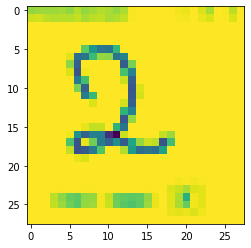

In [38]:
from keras.utils.image_utils import img_to_array
from tensorflow.keras.models import load_model
model = load_model('/content/digit_classifier.h5')
from PIL import Image
import numpy as np

img = Image.open('/content/sample.png').convert("L")
img = img.resize((28,28))
im2arr = np.array(img)
im2arr = im2arr.reshape(1,28,28,1)

#display the image
import matplotlib.pyplot as plt
plt.imshow(img)

#predict the image
y_predict = model.predict(im2arr)
print(np.argmax(y_predict[0]))